# SLU04 - Basic Stats with Pandas: Learning notebook

In this notebook we will cover the following topics:

[Some context](#Some-context)  

[Descriptive Statistics in Pandas](#Descriptive-Statistics-in-Pandas)  
&nbsp; &nbsp; [Count](#Count)  
&nbsp; &nbsp; [Sum, Cumsum](#Sum,-Cumsum)  
&nbsp; &nbsp; [Unique and nunique](#Unique-and-nunique)  
&nbsp; &nbsp; [Max, idxmax, min, idxmin ](#Max,-idxmax,-min,-idxmin)  
&nbsp; &nbsp; [Mode](#Mode)  
&nbsp; &nbsp; [Mean and Median](#Mean-and-Median)  
&nbsp; &nbsp; [Standard Deviation and Variance](#Standard-Deviation-and-Variance)  
&nbsp; &nbsp; [Quantiles](#Quantiles)  
&nbsp; &nbsp; [Rank](#Rank)  

[Inspecting the Distribution of the Data](#Inspecting-the-Distribution-of-the-Data)  
&nbsp; &nbsp; [Skewness](#Skewness)  
&nbsp; &nbsp; [Kurtosis](#Kurtosis)  
&nbsp; &nbsp; [Probability Density Function (PDF)](#Probability-Density-Function-(PDF))  
&nbsp; &nbsp; [Cumulative Distribution Function (CDF)](#Cumulative-Distribution-Function-(CDF))    

[Dealing with outliers and skewed distributions](#Dealing-with-outliers-and-skewed-distributions)  
&nbsp; &nbsp; [Log transformation](#Log-transformation)  

Let's start with a few imports.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import prepare_dataset, get_company_salaries_and_plot, plot_log_function

In [2]:
# Some global plot configurations
plt.rc('figure', dpi=200)  # Resolution
plt.rc('font', size=5, family='serif')   # Font size and family
plt.rc('axes', titlesize=7, labelsize=6, facecolor='white')  # Some axes properties
plt.rc('lines', linewidth=1, color='blue')  # Some line properties

## Some context

Let's have a look at some legos to understand how Statistics (Stats for short) can help us.

![legos](media/legos.jpg)

In [3]:
lego = pd.read_csv('data/sets.csv')

Here's some metadata about the dataset:

![meta](media/metadata.png)

In [4]:
lego.head()  # let's have a look at the first lines of the dataframe

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


We can start using some **basic statistics** to help us understand our dataset. We will go one by one and try to build an intuition for when it's best to use each one.

----

## Descriptive Statistics in Pandas

We already know how to obtain the shape of a pandas DataFrame:

In [5]:
lego.shape

(11673, 5)

### Count

An easy way to obtain the number of non-missing values for each column is using the `count()` method:

In [6]:
lego.count()

set_num      11673
name         11673
year         11673
theme_id     11673
num_parts    11673
dtype: int64

We can see that there are no missing values in this DataFrame.

### Sum, Cumsum

We can use the `sum()` to sum the values of columns. Let's count the total number of parts.

In [7]:
lego.num_parts.sum()

np.int64(1894089)

We can check the cumulative sum over columns using `cumsum()`. Let's check the cumulative sum of the last 10 rows for the number of parts column.

In [8]:
lego.num_parts.cumsum()[-10:]

11663    1893801
11664    1893823
11665    1893823
11666    1893823
11667    1893838
11668    1893853
11669    1893912
11670    1894058
11671    1894086
11672    1894089
Name: num_parts, dtype: int64

### Unique and nunique

One common question is how many **unique values** there are for a field. For example, how many years are there in this data set exactly? And which ones? This can be obtained using the `unique()` method. It gives us the unique values in a Series. 

Let's see what are the years that we have in our dataset, using [`unique()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html): 

In [9]:
lego.year.unique()

array([1970, 1978, 1987, 1979, 1976, 1965, 1985, 1968, 1999, 1967, 1969,
       2001, 1966, 2003, 2002, 2004, 2006, 2005, 2010, 2007, 2008, 2009,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 1977, 1983, 1986, 1984,
       1973, 1981, 2000, 1980, 1982, 1988, 1997, 1998, 1971, 1955, 1956,
       1957, 1958, 1974, 1972, 1975, 1992, 1991, 1989, 1990, 1993, 1994,
       1996, 1995, 1959, 1962, 1961, 1960, 1963, 1964, 1950, 1953, 1954])

How many uniques do we have in `year`? We can use [`nunique()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html):

In [10]:
lego.year.nunique()

66

We can also do this with the entire DataFrame:

In [11]:
lego.nunique()

set_num      11673
name         10370
year            66
theme_id       575
num_parts     1092
dtype: int64

### Max, idxmax, min, idxmin 

> ***What are the maximum and minimum values for the number of parts? And which sets do those values correspond to?***

The maximum number of parts can be obtained very easily using the `max()` method:

In [12]:
lego.num_parts.max()

np.int64(5922)

Which set(s) has/have 5922 parts? To (partially) answer that question, we can use the [`idxmax()`](http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.DataFrame.idxmax.html#pandas.DataFrame.idxmax) method, which tells us the ***first index*** of the maximum value of an array:

In [13]:
lego.num_parts.idxmax()

170

Note that 170 is the first ***index*** in the DataFrame for which the number of parts is maximum. Have a look at the part of the dataset where that value is:

In [14]:
lego[165:175]

,set_num,name,year,theme_id,num_parts
165,10184-1,Town Plan,2008,104,2017
166,10185-1,Green Grocer,2008,155,2358
167,10186-1,General Grievous,2008,173,1084
168,10187-1,Volkswagen Beetle (VW Beetle),2008,276,1625
169,10188-1,Death Star,2008,174,3807
170,10189-1,Taj Mahal,2008,276,5922
171,10190-1,Market Street,2007,155,1250
172,10191-1,Star Justice,2008,397,884
173,10192-1,Space Skulls,2008,397,956
174,10193-1,Medieval Market Village,2009,193,1616


A one-line-answer for the question "which `set_num` has the maximum number of parts" can be written as:

In [15]:
lego.loc[lego.num_parts.idxmax(), 'set_num']

'10189-1'

Of course, there are also the methods `min()` and `idxmin()`.

In [16]:
lego.num_parts.idxmin()

1683

In [17]:
lego.num_parts.min()

np.int64(-1)

Oh no! There are entries which have -1 parts! This is why data understanding is so important and why very basic statistics can help us finding data problems.

You might be wondering if there are **more than one** set with -1 parts in the DataFrame. As mentioned above, the `idxmin()` will only output the ***first index*** for which the number of parts is minimum. A quick way to obtain all the lines with the minimum is the following:

In [18]:
lego.loc[lego.num_parts == lego.num_parts.min()]

,set_num,name,year,theme_id,num_parts
1683,240-1,"Wooden Storage Box Large, Empty",1967,383,-1
6545,66392-1,"Duplo Cars Super Pack 3 in 1 (5816, 5817, 5818)",2012,506,-1
11645,Vancouver-1,"LEGO Store Grand Opening Exclusive Set, Oakrid...",2012,408,-1


So, there are 3 lines with this problem. What should we do about it? At this point we would need to investigate the reason for this (missing value?), but for now let's just drop these instances:

In [19]:
lego = lego.drop(lego.loc[lego.num_parts == lego.num_parts.min()].index, axis=0)

**Note:** The mathematical notation for `idxmax` and `idxmin` is $\text{argmax}$ and $\text{argmin}$, respectively. For instance, the value $x_{\text{max}}$ for which a function $f(x)$ is maximum, if unique, is such that:
$$ x_{\text{max}} =  \text{argmax}_{x} f(x).$$

### Mode

> **"What is the year that had more sets published?"**

For this we can use the `mode()` method. The **mode** is just the most frequent number in a set. 

In [20]:
lego.year.mode()  # Seems like 2014 was the year where more sets were published

0    2014
Name: year, dtype: int64

We can do this for non-numerical data as well. 

In [21]:
lego.name.mode()  # This returns the most frequent name in the column name

0    Basic Building Set
Name: name, dtype: object

### Mean and Median

> ***What is the average number of parts in the sets of legos?***

To answer this question we can check the **mean** and **median** and try to understand that difference between them. 

> **Mean:** sum all the values and divide by the number of values.

$$ \bar{X} = \frac{1}{n} \sum_{i=1}^n X_i $$

In [22]:
lego.num_parts.mean()  # In terms of code, it's as simple as this. We have a mean of 162 numbers of parts

np.float64(162.3043701799486)

> **Median:** This is a bit more tricky the way to do it depends on the number of observations being *odd* or *even*.

<img src="media/median.png" alt="median" style="width: 750px; height: auto" />

Ok, let's look at two simple examples:

In [23]:
pd.Series([1,
           2,
           3,  # <--- ok, this one is easy 
           4,
           5]
         ).median()

np.float64(3.0)

In [24]:
pd.Series([1,
           2,  # <--- both 2 and 3 are in "the middle", as there are only 4 elements
           3,  # <--- so the median will split the difference! 
           4,
          ]
         ).median()

np.float64(2.5)

And on our lego set? 
_(remember, our mean was **162**)_

In [25]:
lego.num_parts.median()  

np.float64(45.0)

Wow, the median is quite different! 45 parts only... why is that?

Let's plot the **histogram** for the distribution of the number of parts. This can be done using the `.plot.hist()` method for a pandas Series:

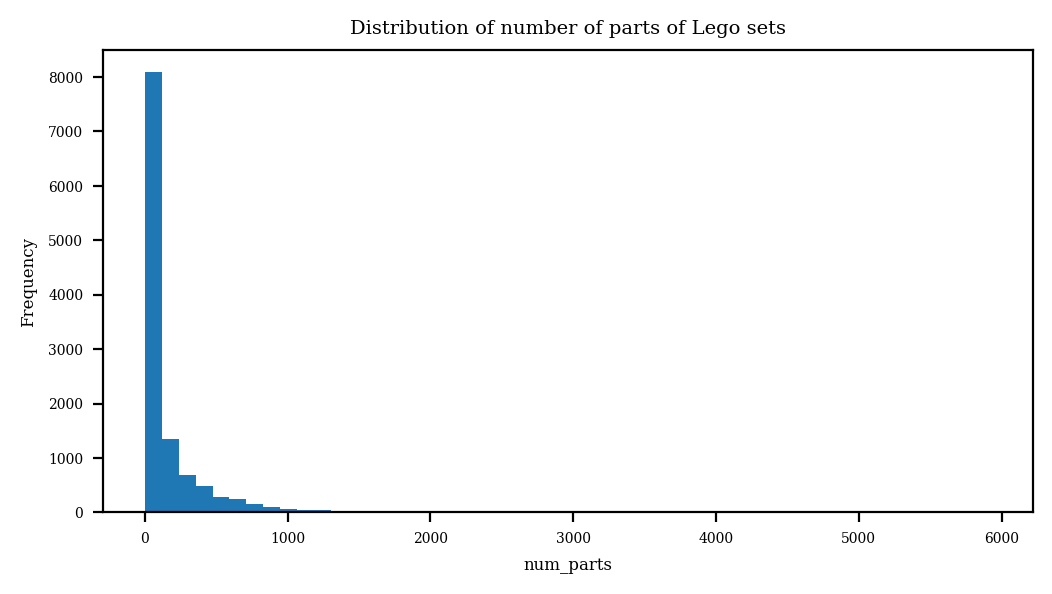

In [26]:
lego.num_parts.plot.hist(bins=50, figsize=(6, 3))
plt.xlabel('num_parts')
plt.title('Distribution of number of parts of Lego sets');

Remember from the analysis so far that:
 - the maximum number of parts is 5922, and so the $x$-axis goes all the way to 6000;
 - the minimum number of parts is 0 (if we pretend we didn't see those -1...);
 - the mean is 162;
 - the median is 45.

From the histogram above, we see that the vast majority of the sets have fewer than 1000 parts. We can actually quantity this statement:

In [27]:
len(lego.loc[lego.num_parts < 1000]) / len(lego)

0.9753213367609255

So, 97.5% of all the sets have fewer than 1000 parts. We could say that the sets with a much larger number of parts are **outliers**, that is, they have extreme values that differ greatly from other values.

Due to existence of these outliers, we see that **mean > median**. In practice, the mean can be highly affected by the existence of **outliers**, whereas the median is not strongly influenced by outliers.

To better understand these ideas, let's consider another example.

![](media/rich_kid.jpg)

Let's say we have a classroom, and the distribution of monthly spending power of the students is as follows: 

In [28]:
s = pd.read_csv('data/student_income.csv', header=None)[0]

In [29]:
print('The mean income of students is   %0.1f' % s.mean())
print('The median income of students is %0.1f' % s.median())

The mean income of students is   600.0
The median income of students is 625.0


Now let's say another student _(let's call him Rich McMoney)_ joins the class: 

In [30]:
rich_mc_money = pd.Series([10000])  # <--- Wooooow! 
s = pd.concat([s,rich_mc_money])

In [31]:
print('The mean income of students is   %0.1f' % s.mean())
print('The median income of students is %0.1f' % s.median())

The mean income of students is   903.2
The median income of students is 630.0


So what do we get? 

<img src="media/news.png" alt="Alt text" style="width: 550px; height: auto" />

As a data scientist you must always be slightly suspicious of single number claims, and the mean is one of the most abused out there. 

#### When to use each? 

So when should we use each one of them? 

* The median may be a better indicator of the **most typical value** if a set has outliers.

* As the data becomes skewed *(see next)* the mean loses its ability to provide the best central location for the data because the skewed data is dragging it away from the typical value. However, the **median best retains this position** and is not as strongly influenced by the outliers.

* However, when the **sample size is large and does not include outliers**, the mean score usually provides a better measure of central tendency.

### Standard Deviation and Variance

The **standard deviation** is a numerical value used to indicate how widely individuals in a group vary. If individual observations vary greatly from the group mean, the standard deviation is big; and vice versa.

Let's look at yet another example, this time the salary distribution in two companies.

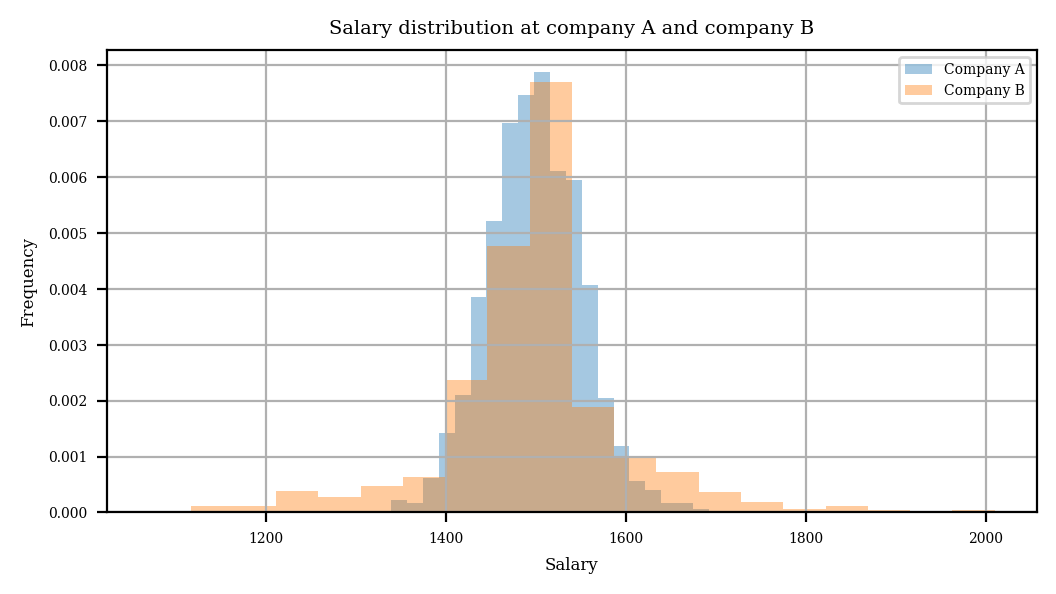

In [32]:
company_a, company_b = get_company_salaries_and_plot()

In [33]:
print('Company A has a mean of %0.1f and a standard deviation of %0.1f' % (
    company_a.mean(), company_a.std()))

print('Company B has a mean of %0.1f and a standard deviation of %0.1f' % (
    company_b.mean(), company_b.std()))

Company A has a mean of 1498.7 and a standard deviation of 52.3
Company B has a mean of 1496.8 and a standard deviation of 101.3


We see that the standard deviation for the salaries is greater in company B, as expected, as the distribution of salaries is more widely spread.

How is the standard deviation computed?

First, we calculate the **variance** $\sigma^2$:
$$ \sigma^2 = \frac{1}{n-1} \sum_{i=1}^n \left(X_i - \bar{X} \right)^2 $$

The standard deviation is then the square root of the variance:
$$ \sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^n \left(X_i - \bar{X} \right)^2}  $$

So, about our legos:

In [34]:
print('Mean:               %0.2f' % lego.num_parts.mean())
print('Variance:           %0.2f' % lego.num_parts.var())
print('Standard Deviation: %0.2f' % lego.num_parts.std())

Mean:               162.30
Variance:           109048.00
Standard Deviation: 330.22


### Quantiles

Remember the median? The median was simply _"the value under which **half** the population is"_. Well, if we replace _"half"_ with _"25%"_ or _"75%"_ we get quantiles! In other words, the median is simply a sub-case of a quantile. 

A **quantile** defines a particular part of a data set, i.e. a quantile determines **how many values in a distribution are above or below a certain limit.** Special quantiles are the **quartile** (quarter), the **quintile** (fifth) and **percentiles** (hundredth).

Quartiles divide a rank-ordered data set into four equal parts. The values that divide each part are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively.

Note the relationship between quartiles and percentiles (which divide a rank-ordered dataset into 100 equal parts). Q1 corresponds to P25, Q2 corresponds to P50, Q3 corresponds to P75. Q2 is the median value in a set of data.

One can also look at the **Interquartile Range**, that basically show us the range where the "middle fifty" is, or in other words, the range between Q1 and Q3.

![quantiles](media/quantiles.png)

Let's see the the Q1, Q2 and Q3 for number of parts column.

In [35]:
quartiles = [.25, .5, .75]
lego.num_parts.quantile(q=quartiles)

0.25     10.0
0.50     45.0
0.75    172.0
Name: num_parts, dtype: float64

We see that 75% of our sets have less than 172 num of parts. Remember how we previously saw that 97.5% of the sets had fewer than approximately 1000 parts? That's another example of a quantile:

In [36]:
lego.num_parts.quantile(q=0.975)

np.float64(996.0)

### Rank

**Rank** is used to compute data ranks along axis, i.e., equal values are assigned to a rank that is the average of the ranks of those values.



In [37]:
lego['default_rank'] = lego['num_parts'].rank()
lego.head()

,set_num,name,year,theme_id,num_parts,default_rank
0,00-1,Weetabix Castle,1970,414,471,10581.5
1,0011-2,Town Mini-Figures,1978,84,12,3093.5
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,889.5
3,0012-1,Space Mini-Figures,1979,143,12,3093.5
4,0013-1,Space Mini-Figures,1979,143,12,3093.5


### Summarizing

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>set_num</th>      <th>name</th>      <th>year</th>      <th>theme_id</th>      <th>num_parts</th>    </tr>  </thead>  <tbody>    <tr>      <th>11316</th>      <td>K8564-1</td>      <td>Ultimate Bohrok Swarm Kit</td>      <td>2002</td>      <td>324</td>      <td>12</td>    </tr>    <tr>      <th>11028</th>      <td>9964-1</td>      <td>Connector Pegs</td>      <td>1994</td>      <td>1</td>      <td>64</td>    </tr>    <tr>      <th>3034</th>      <td>40037-1</td>      <td>Monthly Mini Model Build February 2012 - Hocke...</td>      <td>2012</td>      <td>409</td>      <td>43</td>    </tr>    <tr>      <th>10077</th>      <td>8783-1</td>      <td>Jayko (USA version with 3 Cards)</td>      <td>2004</td>      <td>198</td>      <td>48</td>    </tr>    <tr>      <th>6463</th>      <td>6618-1</td>      <td>Blue Racer</td>      <td>2000</td>      <td>91</td>      <td>23</td>    </tr>  </tbody></table>

As usual, pandas has something extremely helpeful. It's the describe() method. It gives you a summary of what your variable looks like. It's easy to have a look and spot some things you might explore later on.

In [38]:
lego.num_parts.describe()

count    11670.000000
mean       162.304370
std        330.224172
min          0.000000
25%         10.000000
50%         45.000000
75%        172.000000
max       5922.000000
Name: num_parts, dtype: float64

---

## Inspecting the Distribution of the Data

### Skewness

Let's have a look again at the histogram of the number of parts.

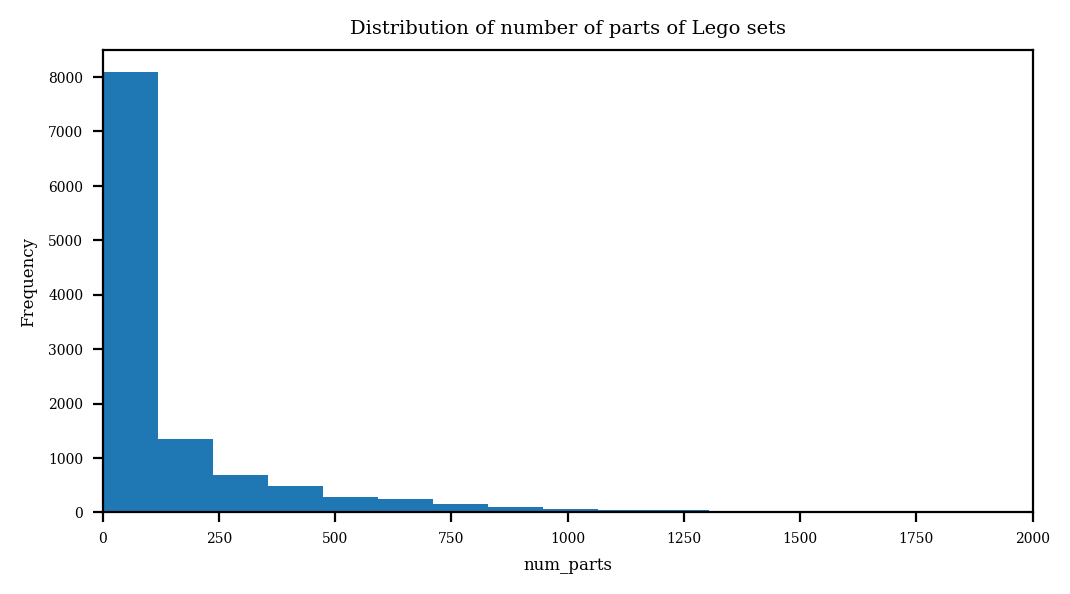

In [39]:
lego.num_parts.plot.hist(bins=50, figsize=(6, 3))
plt.xlim(0,2000)
plt.xlabel('num_parts')
plt.title('Distribution of number of parts of Lego sets');

The mass of the distribution of the number of parts is concentrated to the **left** of the histogram, as we discussed above. Therefore, *of course*, mathematicians say that this distribution is **skewed to the right** or has **positive skew** (*right* correspond to the longer right tail of the distribution).

<div style="text-align: center;">
    <img src="media/negative_and_positive_skew_diagrams.png" alt="Alt text" style="width: 800px; height: auto" />
</div>

The **skewnesss** of a distribution can be quantified (go [here](https://en.wikipedia.org/wiki/Skewness) for more details). The `skew()` method outputs a number which is larger (in absolute value) for more skewed distributions and is positive/negative for positive/negative skew:

In [40]:
lego.num_parts.skew()

np.float64(5.7704793806916514)

Later in this notebook, we will see how we can deal with a very skewed distribution and outliers.

### Kurtosis

_Kurtosis?_ What could such a horrible name have to do with we are dealing with here?

Let's have another look at the plot shown above for the salary distribution at the companies A and B.

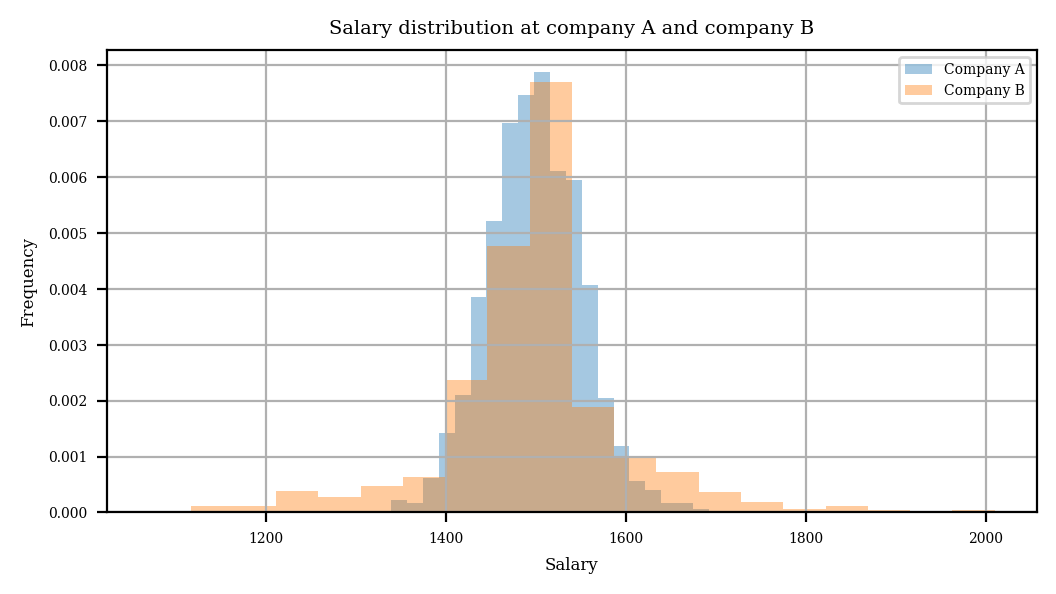

In [41]:
company_a, company_b = get_company_salaries_and_plot()

Can you see that the salary distribution for company B has longer "tails" on both sides than the distribution for company A? The measure of this "tailedness" is known as [kurtosis](https://en.wikipedia.org/wiki/Kurtosis) and it is higher for distributions with more probability mass concentrated in the tails.

A standard measure of kurtosis can be obtained using the method [`kurt()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.kurt.html):

In [42]:
company_a.kurt()

np.float64(0.22420229095281652)

In [43]:
company_b.kurt()

np.float64(4.0409689366297314)

However, this method returns what is known as excess kurtosis. Excess kurtosis is kurtosis relative to the normal distribution. The kurtosis of a normal distribution is 3. Therefore, excess kurtosis equals kurtosis minus 3.

Thus, in this case, we can see company A has a similar frequency of outliers as you would expect in a normal distribution whereas, in company B, outliers occur much more frequently.

### Probability Density Function (PDF)

**Probability Density Function (PDF)** Is a function whose value at any given sample (or point) in the sample space (the set of possible values taken by the random variable) can be interpreted as providing a relative likelihood that the value of the random variable would equal or be close to that sample. It's important to note that the value of the PDF itself is not a probability; instead, it is a density. The probability that the random variable falls within a particular range is given by the integral of the PDF over that range. The higher the PDF at a given point, the higher the density of probability per unit of measure around that point. (go [here](https://en.wikipedia.org/wiki/Probability_density_function) for more details).

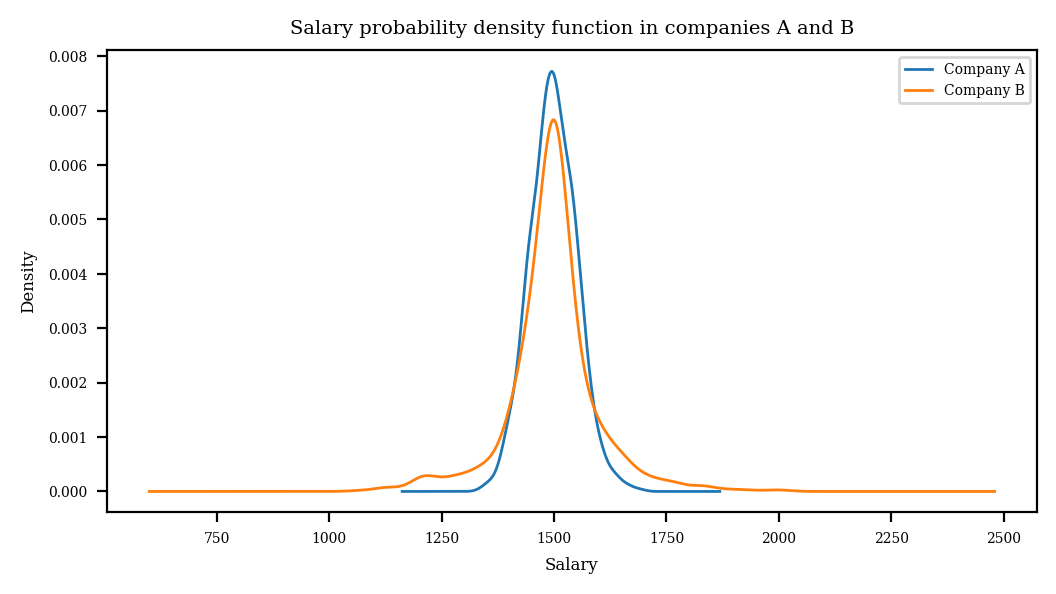

In [44]:
company_a.plot(kind='density', figsize=(6, 3))
company_b.plot(kind='density')
plt.xlabel('Salary')
plt.legend()
plt.title('Salary probability density function in companies A and B');

Think of a PDF as a way to describe how the values of some continuous quantity (height, weight..salaries), are spread out or distributed. It's like a smooth curve that shows where the values of a variable, like salaries in this example, are most likely to be. 

* What it shows: The PDF tells you where the values are concentrated. If the curve is high at a certain point, it means it's more likely to find values near that point. So, if the PDF peaks at 1500, it means a lot of salaries are around that value.
* It's about density, not probability: The PDF doesn't give you probabilities directly. For example, you CANNOT use the PDF to find the probability that a salary is exactly 1500  because the probability of any single exact value in a continuous setting is zero. The PDF provides a relative density, or concentration, of salaries around this point.
* Instead, the PDF helps you find probabilities over intervals. If you want to know the probability of a salary being between 1400 and 1600, you look at the area under the PDF curve between those two values.
* Using the curve: So to find the probability of something within a certain range, you calculate the area under the PDF curve for that range. This is like adding up all the little probabilities for each tiny piece of that interval.

### Cumulative Distribution Function (CDF)

> ⚠️ **Warning:** If you like to search information online, be aware the cumulative distribution function is often called "cumulative density function", which is **[scientifically incorrect!](https://en.wikipedia.org/wiki/Cumulative_density_function)**

**Cumulative distribution function (CDF)** of a real-valued random variable $\text{X}$, or just **distribution function** of $\text{X}$, evaluated at $\text{x}$, is the probability that $\text{X}$ will take a value less than or equal to $\text{x}$.

In essence, the CDF is like a running-total (cumulative sum) of probabilities or frequencies up to each salary point. The CDF starts at zero, meaning that, initially, 0% of the employees earn below the lowest salary. As the CDF increases, it shows, at each salary point, the cumulative percentage of employees who earn that amount or less. When it reaches the highest salary in the company, it means that 100% of the employees earn up to this amount.

(go [here](https://en.wikipedia.org/wiki/Cumulative_distribution_function) for more details).

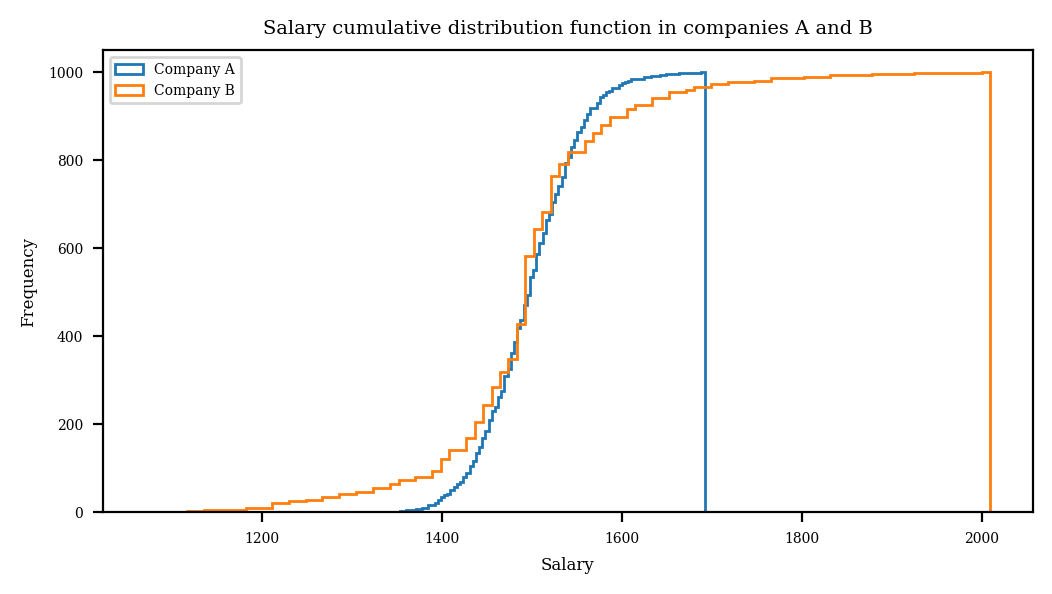

In [45]:
company_a.plot(kind='hist', histtype='step', bins=100, cumulative=True, 
               figsize=(6, 3))
company_b.plot(kind='hist', histtype='step', bins=100, cumulative=True)
plt.xlabel('Salary')
plt.legend()
plt.title('Salary cumulative distribution function in companies A and B');

---

## Dealing with outliers and skewed distributions

When you start doing your Data Science projects, you'll soon realize that outliers are more common than you maybe naively expect. The way you deal with them might be crucial to obtain a good performing model, as many Machine Learning algorithms are seriously disrupted by the presence of outliers (many Decision Tree based algorithms are notable exceptions). 

A few possible strategies to deal with outliers are the following:
 - **do nothing**: similarly to missing values, the simplest strategy is to do nothing! This might be sufficient if you are dealing with numerical data or you intend to use algorithms which are not affected by the presence of outliers.
 - **drop instances with outliers**: although not recommended, you may decide to go this route if you find that the outliers corresponds to wrong data or are out of the region of interest to your use case.
 - **drop column with outliers**: this can be a good idea if you find that the column is not very predictive anyway or if you have another column which has similar information but without the outliers.
 - **impute values**: also similarly to missing values, you can try replacing the extreme values with more reasonable ones (e.g. by capping the outliers at the bottom or top).
 - **binning**: a better strategy usually is to bin the values into a few categories. For instance, for the number of parts of the lego sets we have been looking at, we could have four categories: < 100 parts, 100-250 parts, 250-500 parts and > 500 parts.
 - **transforming data**: a fancy way to eliminate outliers is to transform the data itself. A common transformation to reduce the variance caused by the outliers is the ***log transformation***.

### Log transformation

To better understand how transforming the data might help to eliminate the outliers (and reduce the skewness of the distributions), let's apply the log transformation to the number of parts column of the lego dataset.

First, recall that the function $y = \log(x)$ has the behavior shown in the plot below; for large $x$, the logarithm grows much slower than the identity function $y=x$ (that is, it has a much smaller derivative) and, for large $x$, $\log(x) \ll x$. For example, $\log(100) = 4.6$ and $\log(1000) = 6.9$.

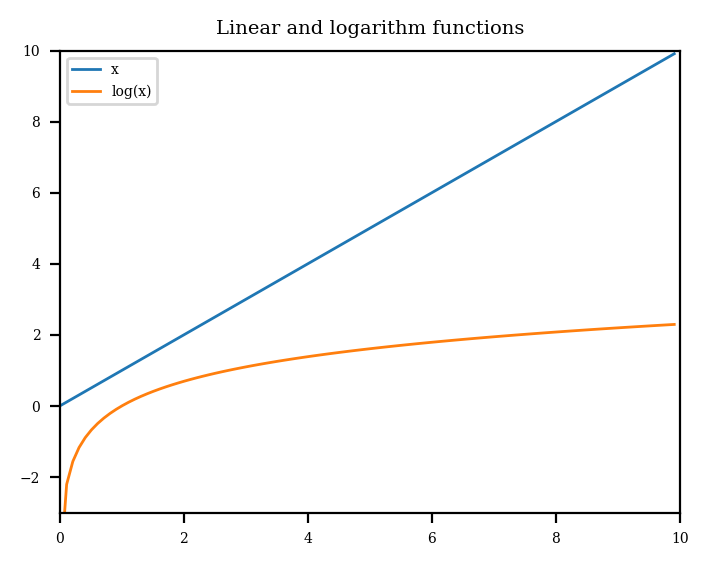

In [46]:
plot_log_function();

An annoying issue is that $y = \log(x)$ is only defined for _positive_ $x$, as $\log(x) \to - \infty$ as $x \to 0$ from positive numbers. But we know that we have lego sets in our dataset which have 0 parts.

Let's have a look at some of those instances.

In [47]:
lego.loc[lego.num_parts == 0].head()

,set_num,name,year,theme_id,num_parts,default_rank
353,10623-1,Basic Bricks – Large,2015,505,0,237.0
355,1064-1,Dacta Buildings,1981,533,0,237.0
613,11995-1,Hero Recon Team,2011,400,0,237.0
900,14-3,Small house set,1973,433,0,237.0
1367,200-2,Building Ideas Book,1985,501,0,237.0


It makes sense that "Building Ideas Book" has 0 lego parts, but it is not clear what's happening for some of the others. 

For our purposes now, and to simplify things, let's just drop the instances with 0 parts.

In [48]:
lego_non_zero = lego.drop(lego.loc[lego.num_parts == 0].index, axis=0)

The distribution of the number of parts still looks essentially the same as before, very skewed to the _right_ (arghh!).

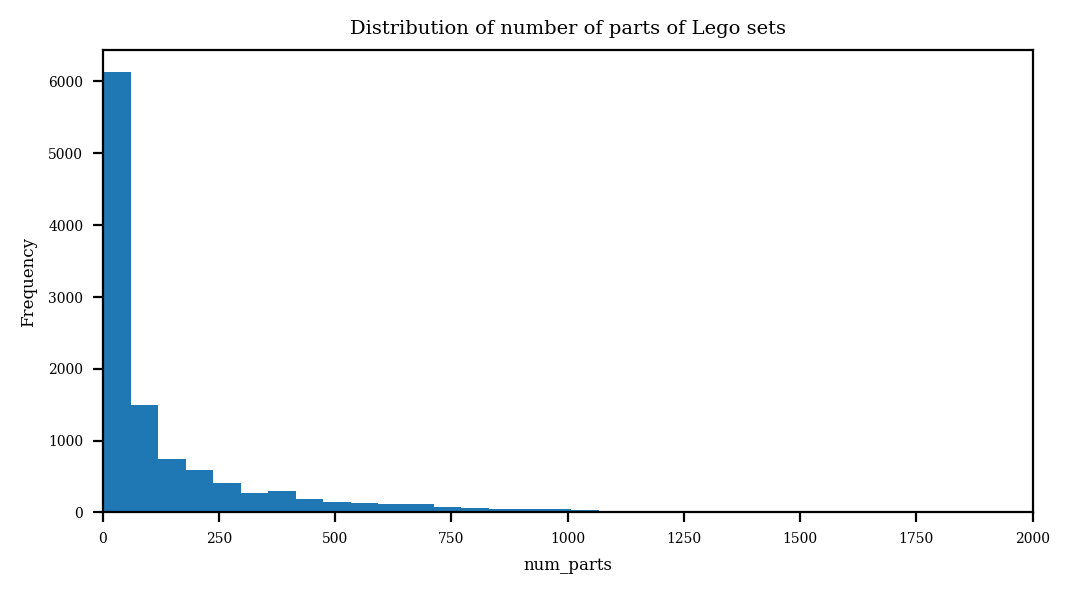

In [49]:
lego_non_zero.num_parts.plot.hist(bins=100, figsize=(6, 3))
plt.xlim(0,2000)
plt.xlabel('num_parts')
plt.title('Distribution of number of parts of Lego sets');

In [50]:
lego_non_zero.num_parts.skew()

np.float64(5.683446598125322)

Let's add a new column with the logarithm of the number of parts and check the resulting distribution.

In [51]:
lego_non_zero['log_num_parts'] = np.log(lego_non_zero.num_parts)

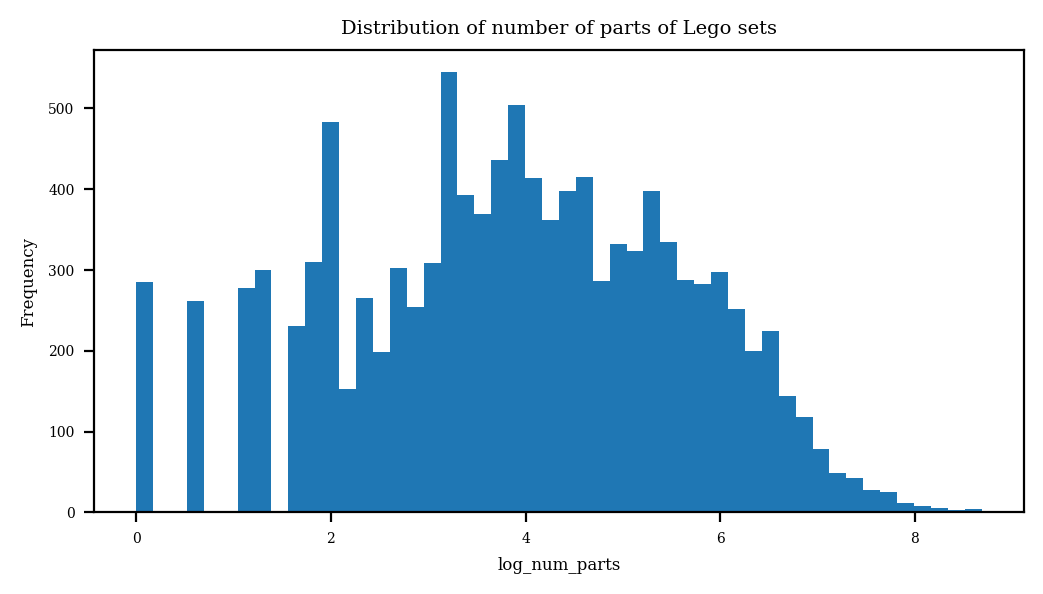

In [52]:
lego_non_zero.log_num_parts.plot.hist(bins=50, figsize=(6, 3))
plt.xlabel('log_num_parts')
plt.title('Distribution of number of parts of Lego sets');

Wow, it looks completely different! And much less skewed, as can be confirmed with the skewness measure:

In [53]:
lego_non_zero.log_num_parts.skew()

np.float64(-0.12708361713551028)

The values are now much less spread. Use the `describe()` method to get the common statistics for the new column:

In [54]:
lego_non_zero.log_num_parts.describe()

count    11197.000000
mean         3.860621
std          1.738087
min          0.000000
25%          2.639057
50%          3.891820
75%          5.209486
max          8.686430
Name: log_num_parts, dtype: float64

From this you see how we were able to deal with the outliers of the `num_parts` column and, simultaneously, drastically reduce the skewness of its distribuition. Not bad, right? Logarithms, after all, can be useful!

----

## TO BE CONTINUED...

_Don't despair, there is more awesome Statistics to learn in the next SLU! For now, let's have a break and apply all this new knowledge in the Exercise Notebook!_